# Filling up the NA's

In [1]:
import pandas as pd
data_p = pd.read_csv('data_p.csv')
#data_p = data_p.drop(columns= 'REFERENCE_DT')
data_p.head()

/var/folders/wq/tcn7dy5j2fs4tkgt0ld5k9gr0000gn/T/ipykernel_5524/990662896.py:2: DtypeWarning: Columns (7,24) have mixed types. Specify dtype option on import or set low_memory=False.
  data_p = pd.read_csv('data_p.csv')


,LOAD_DTTM,SECTION_ECONOMIC_ACTIVITY_CD,FLAG_STARTUP,FLAG_ESFL,FLAG_SGPS,ASSET_AMT,TURNOVER_AMT,AUTONOMIA_FINAN_CORRIGIDA_PCT,RESULTADO_OPER_VS_JUROS_SUPOR,AVG_CRED_VENC_VS_RESP_CGA_12M,...,VOLUME_NEG_VS_ACT_CORR,RESPONS_BANCA_VS_EBITDA,CLASSIFICATION_Q,FINAL_RATING_STANDARD,UNEMPLOYMENT_RT,DEFAULT_FLG,IDENTIFIER,EXPOSURE,ever_default,TARGET
0,2020-09-30,G,0.0,0.0,0.0,"2,585,325.84","1,277,202.18",0.14,2.21,0.0,...,6.39,7.475686,46.8,5.0,NaN,0.0,1,1244823.50,0.0,0
1,2020-10-31,G,0.0,0.0,0.0,"2,585,325.84","1,277,202.18",0.14,2.21,0.0,...,6.39,7.466365,46.8,5.0,NaN,0.0,1,1244979.90,0.0,0
2,2020-11-30,G,0.0,0.0,0.0,"2,585,325.84","1,277,202.18",0.14,2.21,0.0,...,6.39,7.439315,46.8,4.0,5.75,0.0,1,1244823.50,0.0,0
3,2020-12-31,G,0.0,0.0,0.0,"2,585,325.84","1,277,202.18",0.14,2.21,0.0,...,6.39,7.417450,46.8,4.0,5.70,0.0,1,1273989.53,0.0,0
4,2021-01-31,G,0.0,0.0,0.0,"2,585,325.84","1,277,202.18",0.14,2.21,0.0,...,6.39,7.592852,46.8,4.0,5.70,0.0,1,1273035.60,0.0,0


In [2]:
missing_proportion_by_column = data_p.isnull().mean(axis=0)

# Display the proportion of missing values for each column
print("Proportion of missing values by column:\n", missing_proportion_by_column)

Proportion of missing values by column:
 LOAD_DTTM                           0.000000
SECTION_ECONOMIC_ACTIVITY_CD        0.665974
FLAG_STARTUP                        0.000000
FLAG_ESFL                           0.000000
FLAG_SGPS                           0.000000
ASSET_AMT                           0.004201
TURNOVER_AMT                        0.004201
AUTONOMIA_FINAN_CORRIGIDA_PCT       0.004347
RESULTADO_OPER_VS_JUROS_SUPOR       0.314792
AVG_CRED_VENC_VS_RESP_CGA_12M       0.869978
AVG_CRED_VENC_VS_RESP_BANCA_12M     0.857460
INDICADOR_CRED_VENC_BANCA_12M       0.000000
INDICADOR_CRED_VENC_GCA_12M         0.000000
FLAG_DESCOBERTOS_N_AUT_12M          0.000000
TOTAL_FINAN_OBT_VS_TOTAL_PASSIVO    0.052530
RESPONS_BANCA_VS_RENDIMENTO         0.868114
X_UTR_CD_12M                        0.000000
JUROS_GASTOS_SUPORTADOS_VS_ATIVO    0.004351
MEIOS_FINAN_PASSIVO_CORRENTE        0.016934
RESUL_ANTES_IMP_VS_RESP_BANCA       0.872877
PRAZO_MEDIO_RECEBIMENTO             0.132502
RESPONS_GCA_VS

### Formaring 

In [3]:
for column, dtype in data_p.dtypes.items():
    print(f"{column}, Type: {dtype}")

LOAD_DTTM, Type: object
SECTION_ECONOMIC_ACTIVITY_CD, Type: object
FLAG_STARTUP, Type: float64
FLAG_ESFL, Type: float64
FLAG_SGPS, Type: float64
ASSET_AMT, Type: object
TURNOVER_AMT, Type: object
AUTONOMIA_FINAN_CORRIGIDA_PCT, Type: object
RESULTADO_OPER_VS_JUROS_SUPOR, Type: object
AVG_CRED_VENC_VS_RESP_CGA_12M, Type: float64
AVG_CRED_VENC_VS_RESP_BANCA_12M, Type: float64
INDICADOR_CRED_VENC_BANCA_12M, Type: float64
INDICADOR_CRED_VENC_GCA_12M, Type: float64
FLAG_DESCOBERTOS_N_AUT_12M, Type: int64
TOTAL_FINAN_OBT_VS_TOTAL_PASSIVO, Type: float64
RESPONS_BANCA_VS_RENDIMENTO, Type: float64
X_UTR_CD_12M, Type: float64
JUROS_GASTOS_SUPORTADOS_VS_ATIVO, Type: float64
MEIOS_FINAN_PASSIVO_CORRENTE, Type: object
RESUL_ANTES_IMP_VS_RESP_BANCA, Type: float64
PRAZO_MEDIO_RECEBIMENTO, Type: object
RESPONS_GCA_VS_RENDIMENTO, Type: float64
NET_DEBT_EBITDA, Type: object
MARGEM_EXPLO_JUROS_SUPORT, Type: object
VOLUME_NEG_VS_ACT_CORR, Type: object
RESPONS_BANCA_VS_EBITDA, Type: float64
CLASSIFICATION_Q

In [4]:
numeric_columns = ['ASSET_AMT', 'TURNOVER_AMT',
                   'AUTONOMIA_FINAN_CORRIGIDA_PCT', 'RESULTADO_OPER_VS_JUROS_SUPOR',
                   'MEIOS_FINAN_PASSIVO_CORRENTE', 'PRAZO_MEDIO_RECEBIMENTO',
                   'NET_DEBT_EBITDA', 'MARGEM_EXPLO_JUROS_SUPORT', 'VOLUME_NEG_VS_ACT_CORR']
# Convert selected columns to numeric after removing commas
for column in numeric_columns:
    data_p[column] = pd.to_numeric(data_p[column].replace({',': ''}, regex=True), errors='coerce')
    
factor_columns = ['FLAG_STARTUP', 'FLAG_ESFL', 'FLAG_SGPS',
                  'INDICADOR_CRED_VENC_BANCA_12M', 'INDICADOR_CRED_VENC_GCA_12M',
                  'FLAG_DESCOBERTOS_N_AUT_12M', 'X_UTR_CD_12M', 'DEFAULT_FLG',
                  'SECTION_ECONOMIC_ACTIVITY_CD', 'IDENTIFIER', 'TARGET', 'ever_default']
# Convert selected columns to factors
data_p[factor_columns] = data_p[factor_columns].astype('category')

In [5]:
numerical_cols = data_p.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data_p.select_dtypes(include=['category']).columns
print(numerical_cols)
print(categorical_cols)

Index(['ASSET_AMT', 'TURNOVER_AMT', 'AUTONOMIA_FINAN_CORRIGIDA_PCT',
       'RESULTADO_OPER_VS_JUROS_SUPOR', 'AVG_CRED_VENC_VS_RESP_CGA_12M',
       'AVG_CRED_VENC_VS_RESP_BANCA_12M', 'TOTAL_FINAN_OBT_VS_TOTAL_PASSIVO',
       'RESPONS_BANCA_VS_RENDIMENTO', 'JUROS_GASTOS_SUPORTADOS_VS_ATIVO',
       'MEIOS_FINAN_PASSIVO_CORRENTE', 'RESUL_ANTES_IMP_VS_RESP_BANCA',
       'PRAZO_MEDIO_RECEBIMENTO', 'RESPONS_GCA_VS_RENDIMENTO',
       'NET_DEBT_EBITDA', 'MARGEM_EXPLO_JUROS_SUPORT',
       'VOLUME_NEG_VS_ACT_CORR', 'RESPONS_BANCA_VS_EBITDA', 'CLASSIFICATION_Q',
       'FINAL_RATING_STANDARD', 'UNEMPLOYMENT_RT', 'EXPOSURE'],
      dtype='object')
Index(['SECTION_ECONOMIC_ACTIVITY_CD', 'FLAG_STARTUP', 'FLAG_ESFL',
       'FLAG_SGPS', 'INDICADOR_CRED_VENC_BANCA_12M',
       'INDICADOR_CRED_VENC_GCA_12M', 'FLAG_DESCOBERTOS_N_AUT_12M',
       'X_UTR_CD_12M', 'DEFAULT_FLG', 'IDENTIFIER', 'ever_default', 'TARGET'],
      dtype='object')


In [6]:
mean_value = data_p['FINAL_RATING_STANDARD'].mean()
print(f"The mean of 'FINAL_RATING_STANDARD' is: {mean_value}")
category_counts = data_p['DEFAULT_FLG'].value_counts()
category_proportions = category_counts / len(data_p)

print("Category Proportions:",category_proportions)

The mean of 'FINAL_RATING_STANDARD' is: 2.9062162889106875
Category Proportions: DEFAULT_FLG
0.0    0.985453
1.0    0.014547
Name: count, dtype: float64


In [7]:
# Filter the rows where 'target' is equal to 1
filtered_data = data_p[data_p['TARGET'] == 1]

# Get distinct 'IDENTIFIER' values from the filtered DataFrame
distinct_identifiers = filtered_data['IDENTIFIER'].drop_duplicates()

# Display the number of distinct companies in default
num_companies_in_default = len(distinct_identifiers)
print(f"Months in 'default': {len(filtered_data)} rows")
print(f"Distinct companies in default: {num_companies_in_default} companies")

Months in 'default': 24440 rows
Distinct companies in default: 935 companies


In [8]:
num_columns_to_interpolate = data_p.select_dtypes(include=['float64', 'int64']).columns
categorical_columns_to_interpolate = ['SECTION_ECONOMIC_ACTIVITY_CD', 'FLAG_STARTUP', 'FLAG_ESFL','FLAG_SGPS']
#'INDICADOR_CRED_VENC_BANCA_12M','INDICADOR_CRED_VENC_GCA_12M', 'FLAG_DESCOBERTOS_N_AUT_12M','X_UTR_CD_12M'

cols_to_interpolate =['IDENTIFIER','LOAD_DTTM']
for i in num_columns_to_interpolate:
    cols_to_interpolate.append(i)
for i in categorical_columns_to_interpolate:
    cols_to_interpolate.append(i)
print(cols_to_interpolate)

['IDENTIFIER', 'LOAD_DTTM', 'ASSET_AMT', 'TURNOVER_AMT', 'AUTONOMIA_FINAN_CORRIGIDA_PCT', 'RESULTADO_OPER_VS_JUROS_SUPOR', 'AVG_CRED_VENC_VS_RESP_CGA_12M', 'AVG_CRED_VENC_VS_RESP_BANCA_12M', 'TOTAL_FINAN_OBT_VS_TOTAL_PASSIVO', 'RESPONS_BANCA_VS_RENDIMENTO', 'JUROS_GASTOS_SUPORTADOS_VS_ATIVO', 'MEIOS_FINAN_PASSIVO_CORRENTE', 'RESUL_ANTES_IMP_VS_RESP_BANCA', 'PRAZO_MEDIO_RECEBIMENTO', 'RESPONS_GCA_VS_RENDIMENTO', 'NET_DEBT_EBITDA', 'MARGEM_EXPLO_JUROS_SUPORT', 'VOLUME_NEG_VS_ACT_CORR', 'RESPONS_BANCA_VS_EBITDA', 'CLASSIFICATION_Q', 'FINAL_RATING_STANDARD', 'UNEMPLOYMENT_RT', 'EXPOSURE', 'SECTION_ECONOMIC_ACTIVITY_CD', 'FLAG_STARTUP', 'FLAG_ESFL', 'FLAG_SGPS']


### Imputation

In [9]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Select the relevant columns
data_to_interpolate = data_p[cols_to_interpolate]

# Separate numerical and categorical columns
numerical_cols = data_to_interpolate.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = data_to_interpolate.select_dtypes(include=['object']).columns

# Group by identifier and interpolate missing values within each group
for identifier, group in data_to_interpolate.groupby('IDENTIFIER'):
    group = group.sort_values('LOAD_DTTM')  # Sort by date if necessary

    # Interpolate numerical features using linear regression
    for num_col in numerical_cols:
        group[num_col] = group[num_col].interpolate(method='linear', limit_direction='both')

    # Interpolate categorical features using the most common category
    for cat_col in categorical_cols:
        most_common_category = group[cat_col].mode().iloc[0]
        group[cat_col].fillna(most_common_category, inplace=True)

    # Replace the original data_p with the interpolated values
    data_p.loc[data_p['IDENTIFIER'] == identifier, data_to_interpolate.columns] = group[data_to_interpolate.columns]

# Reset index after the changes
data_p.reset_index(drop=True, inplace=True)

In [10]:
new_category = 'UNKNOWN'
# Add the new category to the existing categories (if it doesn't already exist)
data_p['SECTION_ECONOMIC_ACTIVITY_CD'] = data_p['SECTION_ECONOMIC_ACTIVITY_CD'].cat.add_categories(new_category)
# Fill missing values with the new category
data_p['SECTION_ECONOMIC_ACTIVITY_CD'] = data_p['SECTION_ECONOMIC_ACTIVITY_CD'].fillna(new_category)

In [11]:
columns_to_fill = ['FLAG_STARTUP', 'FLAG_ESFL', 'FLAG_SGPS', 'INDICADOR_CRED_VENC_BANCA_12M', 'INDICADOR_CRED_VENC_GCA_12M', 'X_UTR_CD_12M']
# Fill missing values with 0 for the selected columns
data_p[columns_to_fill] = data_p[columns_to_fill].fillna(0)

In [12]:
missing_proportion_by_column = data_p.isnull().mean(axis=0)

# Display the proportion of missing values for each column
print("Proportion of missing values by column:\n", missing_proportion_by_column)

Proportion of missing values by column:
 LOAD_DTTM                           0.000000
SECTION_ECONOMIC_ACTIVITY_CD        0.000000
FLAG_STARTUP                        0.000000
FLAG_ESFL                           0.000000
FLAG_SGPS                           0.000000
ASSET_AMT                           0.003219
TURNOVER_AMT                        0.003219
AUTONOMIA_FINAN_CORRIGIDA_PCT       0.003264
RESULTADO_OPER_VS_JUROS_SUPOR       0.170130
AVG_CRED_VENC_VS_RESP_CGA_12M       0.839648
AVG_CRED_VENC_VS_RESP_BANCA_12M     0.829670
INDICADOR_CRED_VENC_BANCA_12M       0.000000
INDICADOR_CRED_VENC_GCA_12M         0.000000
FLAG_DESCOBERTOS_N_AUT_12M          0.000000
TOTAL_FINAN_OBT_VS_TOTAL_PASSIVO    0.004332
RESPONS_BANCA_VS_RENDIMENTO         0.831609
X_UTR_CD_12M                        0.000000
JUROS_GASTOS_SUPORTADOS_VS_ATIVO    0.003264
MEIOS_FINAN_PASSIVO_CORRENTE        0.005653
RESUL_ANTES_IMP_VS_RESP_BANCA       0.837359
PRAZO_MEDIO_RECEBIMENTO             0.081627
RESPONS_GCA_VS

In [13]:
from sklearn.impute import SimpleImputer

numeric_columns = ['ASSET_AMT', 'TURNOVER_AMT', 'AVG_CRED_VENC_VS_RESP_CGA_12M',
                  'AUTONOMIA_FINAN_CORRIGIDA_PCT', 'RESULTADO_OPER_VS_JUROS_SUPOR', 'AVG_CRED_VENC_VS_RESP_BANCA_12M',
                  'TOTAL_FINAN_OBT_VS_TOTAL_PASSIVO','RESPONS_BANCA_VS_RENDIMENTO','JUROS_GASTOS_SUPORTADOS_VS_ATIVO',
                  'MEIOS_FINAN_PASSIVO_CORRENTE','RESUL_ANTES_IMP_VS_RESP_BANCA','PRAZO_MEDIO_RECEBIMENTO',
                   'RESPONS_GCA_VS_RENDIMENTO', 'NET_DEBT_EBITDA','MARGEM_EXPLO_JUROS_SUPORT',
                  'VOLUME_NEG_VS_ACT_CORR', 'RESPONS_BANCA_VS_EBITDA', 'CLASSIFICATION_Q','UNEMPLOYMENT_RT']


data_to_impute = data_p[numeric_columns]

# Initialize the SimpleImputer with strategy='mean'
imputer = SimpleImputer(strategy='median')

# Fit and transform the data with the imputer
data_imputed = imputer.fit_transform(data_to_impute)

# Convert the imputed data back to a DataFrame
data_imputed_df = pd.DataFrame(data_imputed, columns=numeric_columns)

# Update the original DataFrame with the imputed values
data_p[numeric_columns] = data_imputed_df

In [14]:
mean_value = data_p['FINAL_RATING_STANDARD'].mean()
print(f"The mean of 'FINAL_RATING_STANDARD' is: {mean_value}")
category_counts = data_p['DEFAULT_FLG'].value_counts()
category_proportions = category_counts / len(data_p)

print("Category Proportions:",category_proportions)

The mean of 'FINAL_RATING_STANDARD' is: 2.9062162889106875
Category Proportions: DEFAULT_FLG
0.0    0.985453
1.0    0.014547
Name: count, dtype: float64


In [15]:
# Filter the rows where 'target' is equal to 1
filtered_data = data_p[data_p['TARGET'] == 1]

# Get distinct 'IDENTIFIER' values from the filtered DataFrame
distinct_identifiers = filtered_data['IDENTIFIER'].drop_duplicates()

# Display the number of distinct companies in default
num_companies_in_default = len(distinct_identifiers)
print(f"Months in 'default': {len(filtered_data)} rows")
print(f"Distinct companies in default: {num_companies_in_default} companies")

Months in 'default': 24440 rows
Distinct companies in default: 935 companies


In [16]:
missing_proportion_by_column = data_p.isnull().mean(axis=0)

# Display the proportion of missing values for each column
print("Proportion of missing values by column:\n", missing_proportion_by_column)

Proportion of missing values by column:
 LOAD_DTTM                           0.000000
SECTION_ECONOMIC_ACTIVITY_CD        0.000000
FLAG_STARTUP                        0.000000
FLAG_ESFL                           0.000000
FLAG_SGPS                           0.000000
ASSET_AMT                           0.000000
TURNOVER_AMT                        0.000000
AUTONOMIA_FINAN_CORRIGIDA_PCT       0.000000
RESULTADO_OPER_VS_JUROS_SUPOR       0.000000
AVG_CRED_VENC_VS_RESP_CGA_12M       0.000000
AVG_CRED_VENC_VS_RESP_BANCA_12M     0.000000
INDICADOR_CRED_VENC_BANCA_12M       0.000000
INDICADOR_CRED_VENC_GCA_12M         0.000000
FLAG_DESCOBERTOS_N_AUT_12M          0.000000
TOTAL_FINAN_OBT_VS_TOTAL_PASSIVO    0.000000
RESPONS_BANCA_VS_RENDIMENTO         0.000000
X_UTR_CD_12M                        0.000000
JUROS_GASTOS_SUPORTADOS_VS_ATIVO    0.000000
MEIOS_FINAN_PASSIVO_CORRENTE        0.000000
RESUL_ANTES_IMP_VS_RESP_BANCA       0.000000
PRAZO_MEDIO_RECEBIMENTO             0.000000
RESPONS_GCA_VS

### Imputing the exposure -- NOT USED

In [21]:
# I am not sure I can use this 
#from sklearn.impute import KNNImputer
#k means clustering 
# Define the columns for imputation (including the target column)
#columns_for_imputation = ['EXPOSURE', 'ASSET_AMT', 'TOTAL_FINAN_OBT_VS_TOTAL_PASSIVO']

# Create a DataFrame with selected columns
#data_for_imputation = data_p[columns_for_imputation]

# Separate the target column (EXPOSURE) from the features
#target_column = 'EXPOSURE'
#features_columns = [col for col in columns_for_imputation if col != target_column]

# Initialize the KNNImputer
#imputer = KNNImputer(n_neighbors=30)

# Fit and transform the data with the imputer
#data_imputed = imputer.fit_transform(data_for_imputation)

# Convert the imputed data back to a DataFrame
#data_imputed_df = pd.DataFrame(data_imputed, columns=columns_for_imputation)
# Update the original DataFrame with the imputed values for the target column
#data_p[target_column] = data_imputed_df[target_column]

In [36]:
len(data_p)

1238835

### Dropping the first and last 12 m of obs. 

In [19]:
# dropping the last 12 m of obs. because we cant really say anything about it
data_p = data_p[data_p['LOAD_DTTM'] <= "2022-11-30"] 
len(data_p)

931109

In [20]:
data_p = data_p[data_p['LOAD_DTTM']>"2019-11-30"]
len(data_p)

931109

#### Exporting the data

In [21]:
data_p.to_csv('data_model.csv', index=False)
len(data_p)

931109

# Data description

In [22]:
len(data_p['IDENTIFIER'].unique())

34904

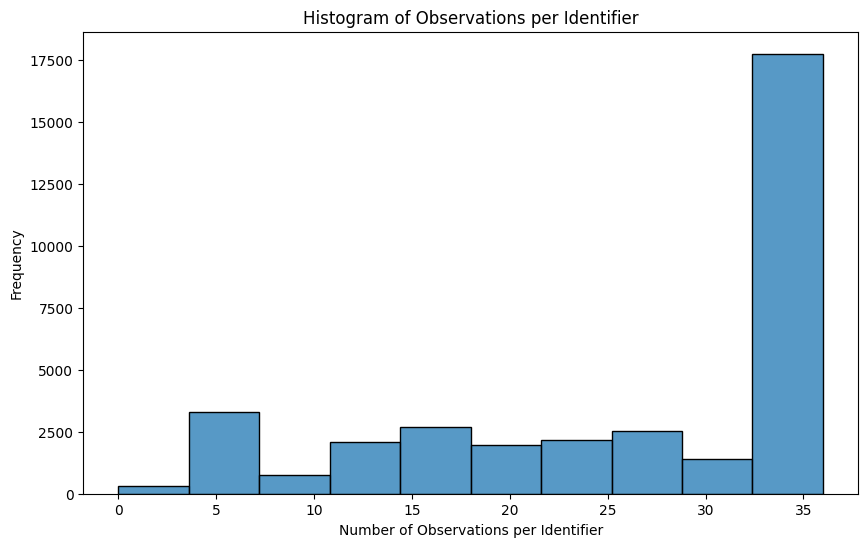

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_p' is your DataFrame
# Count the occurrences of each IDENTIFIER
identifier_counts = data_p['IDENTIFIER'].value_counts()

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(identifier_counts, bins=10, kde=False)

plt.xlabel('Number of Observations per Identifier')
plt.ylabel('Frequency')
plt.title('Histogram of Observations per Identifier')
plt.grid(False)
plt.show()


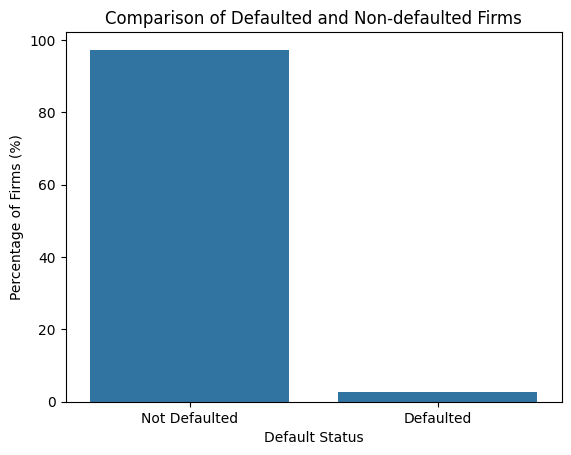

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_p' is your DataFrame and it has been loaded correctly

# Calculate the counts of unique identifiers by their default status
default_counts = data_p.groupby('ever_default')['IDENTIFIER'].nunique()

# Calculate the total for normalization to percentage
total_firms = default_counts.sum()

# Convert counts to percentages
default_percentages = (default_counts / total_firms) * 100

# Reset index to turn it into a DataFrame suitable for Seaborn
default_percentages_df = default_percentages.reset_index(name='Percentage of Firms')

# Create a bar plot
sns.barplot(x='ever_default', y='Percentage of Firms', data=default_percentages_df)

# Set the labels and title
plt.xlabel('Default Status')
plt.ylabel('Percentage of Firms (%)')
plt.title('Comparison of Defaulted and Non-defaulted Firms')
plt.xticks([0, 1], ['Not Defaulted', 'Defaulted'])  # Assuming 0 is for not defaulted, 1 for defaulted

# Show the plot
plt.show()

In [25]:
data_b =data_p

Unique values in DEFAULT_FLG: [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]


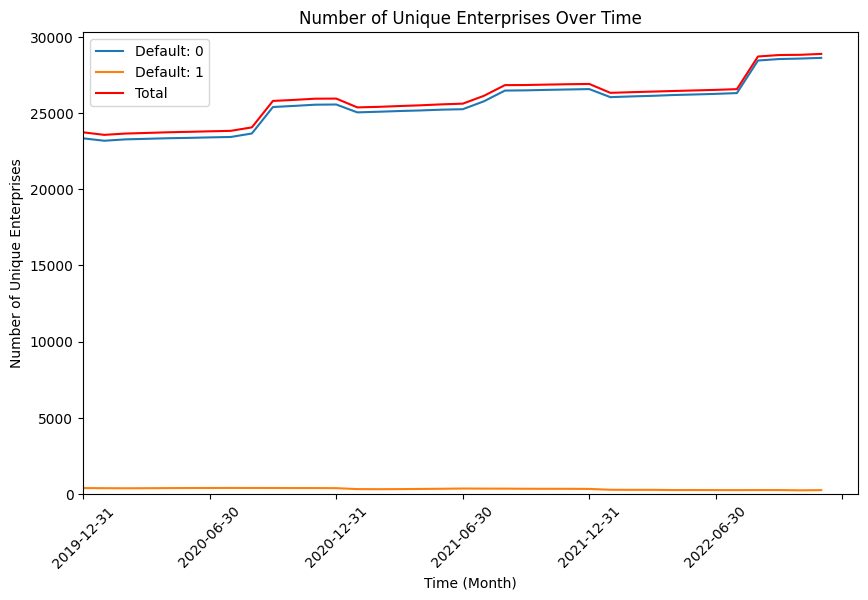

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# Assuming 'data_p' is your DataFrame and it has been loaded correctly
# Check unique values in DEFAULT_FLG
default_flag_values = data_p['DEFAULT_FLG'].unique()
print("Unique values in DEFAULT_FLG:", default_flag_values)

# Group by LOAD_DTTM and DEFAULT_FLG, then count the unique identifiers
grouped_data = data_p.groupby(['LOAD_DTTM', 'DEFAULT_FLG'])['IDENTIFIER'].nunique().reset_index(name='Unique Identifiers')

# Calculate total unique identifiers for each LOAD_DTTM
total_unique = data_p.groupby('LOAD_DTTM')['IDENTIFIER'].nunique().reset_index(name='Total Unique Identifiers')

# Pivot the data for plotting
pivot_data = grouped_data.pivot(index='LOAD_DTTM', columns='DEFAULT_FLG', values='Unique Identifiers').fillna(0)

# Plotting
plt.figure(figsize=(10, 6))

# Plot each category from DEFAULT_FLG
for value in default_flag_values:
    plt.plot(pivot_data.index, pivot_data[value], label=f'Default: {int(value)}', marker='')

# Plot the total unique identifiers
plt.plot(total_unique['LOAD_DTTM'], total_unique['Total Unique Identifiers'], label='Total', marker='', color='red', linestyle='-')

# Adjust x-axis and y-axis limits
plt.xlim(left=0)
plt.ylim(bottom=0)

# Set x-axis locator
if len(pivot_data.index) > 0:
    locator = MultipleLocator(6)  # Display every sixth label
    plt.gca().xaxis.set_major_locator(locator)

plt.xlabel('Time (Month)')
plt.ylabel('Number of Unique Enterprises')
plt.title('Number of Unique Enterprises Over Time')
plt.xticks(rotation=45)
plt.grid(False)
plt.legend()  # Add legend to distinguish Defaulted, Not Defaulted, and Total
plt.show()


/var/folders/wq/tcn7dy5j2fs4tkgt0ld5k9gr0000gn/T/ipykernel_84578/2442502564.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  defaulted_data['Percentage'] = (defaulted_data['Count'] / defaulted_data['Total Count']) * 100


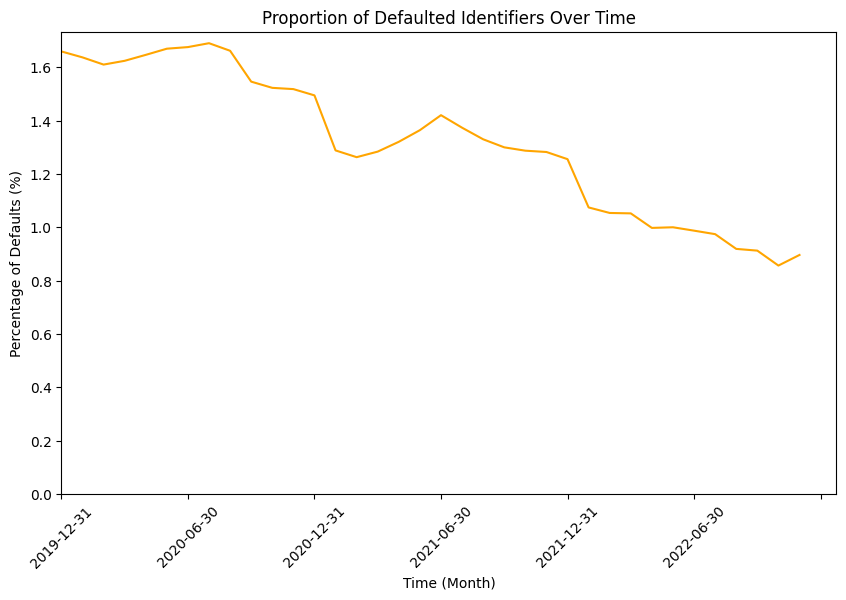

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data_p' is your DataFrame
# Ensure 'LOAD_DTTM' is in the correct format (convert to string for plotting if needed)
data_p['LOAD_DTTM'] = data_p['LOAD_DTTM'].astype(str)

# Group by LOAD_DTTM and DEFAULT_FLG, and count the unique identifiers
grouped_data = data_p.groupby(['LOAD_DTTM', 'DEFAULT_FLG'])['IDENTIFIER'].nunique().reset_index(name='Count')

# Calculate the total unique identifiers for each LOAD_DTTM
total_counts = grouped_data.groupby('LOAD_DTTM')['Count'].sum().reset_index(name='Total Count')

# Merge the total counts back to the grouped data
grouped_data = grouped_data.merge(total_counts, on='LOAD_DTTM')

# Filter for defaulted identifiers (DEFAULT_FLG == 1)
defaulted_data = grouped_data[grouped_data['DEFAULT_FLG'] == 1]

# Calculate the percentage
defaulted_data['Percentage'] = (defaulted_data['Count'] / defaulted_data['Total Count']) * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(defaulted_data['LOAD_DTTM'], defaulted_data['Percentage'], marker='',color='orange', linestyle='-')
if len(pivot_data.index) > 0:
    locator = MultipleLocator(6)  # Display every sixth label
    plt.gca().xaxis.set_major_locator(locator)

plt.xlim(left=0)
plt.ylim(bottom=0)
    
plt.xlabel('Time (Month)')
plt.ylabel('Percentage of Defaults (%)')
plt.title('Proportion of Defaulted Identifiers Over Time')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


/var/folders/wq/tcn7dy5j2fs4tkgt0ld5k9gr0000gn/T/ipykernel_84578/2191546865.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predicted_defaults_data['Percentage'] = (predicted_defaults_data['Count'] / predicted_defaults_data['Total Count']) * 100


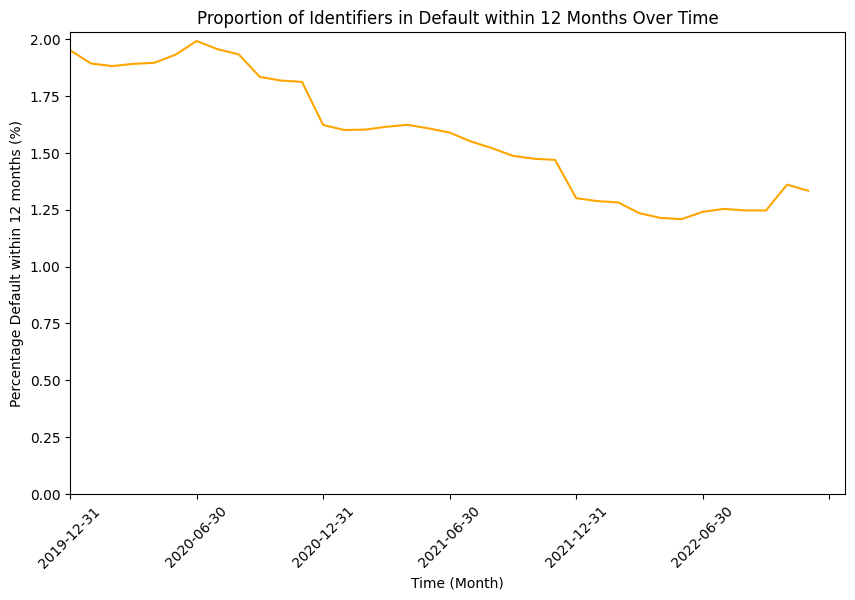

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# Assuming 'data_p' is your DataFrame
# Ensure 'LOAD_DTTM' is in the correct format (convert to string for plotting if needed)
data_p['LOAD_DTTM'] = data_p['LOAD_DTTM'].astype(str)

# Group by LOAD_DTTM and TARGET, and count the unique identifiers
grouped_data = data_p.groupby(['LOAD_DTTM', 'TARGET'])['IDENTIFIER'].nunique().reset_index(name='Count')

# Calculate the total unique identifiers for each LOAD_DTTM
total_counts = grouped_data.groupby('LOAD_DTTM')['Count'].sum().reset_index(name='Total Count')

# Merge the total counts back to the grouped data
grouped_data = grouped_data.merge(total_counts, on='LOAD_DTTM')

# Filter for identifiers predicted to default (TARGET == 1)
predicted_defaults_data = grouped_data[grouped_data['TARGET'] == 1]

# Calculate the percentage
predicted_defaults_data['Percentage'] = (predicted_defaults_data['Count'] / predicted_defaults_data['Total Count']) * 100

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(predicted_defaults_data['LOAD_DTTM'], predicted_defaults_data['Percentage'], marker='', color='orange', linestyle='-')

# Set x-axis locator
if len(predicted_defaults_data['LOAD_DTTM']) > 0:
    locator = MultipleLocator(6)  # Display every sixth label
    plt.gca().xaxis.set_major_locator(locator)

plt.xlim(left=0)
plt.ylim(bottom=0)
    
plt.xlabel('Time (Month)')
plt.ylabel('Percentage Default within 12 months (%)')
plt.title('Proportion of Identifiers in Default within 12 Months Over Time')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()


/var/folders/wq/tcn7dy5j2fs4tkgt0ld5k9gr0000gn/T/ipykernel_84578/2975449654.py:12: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(


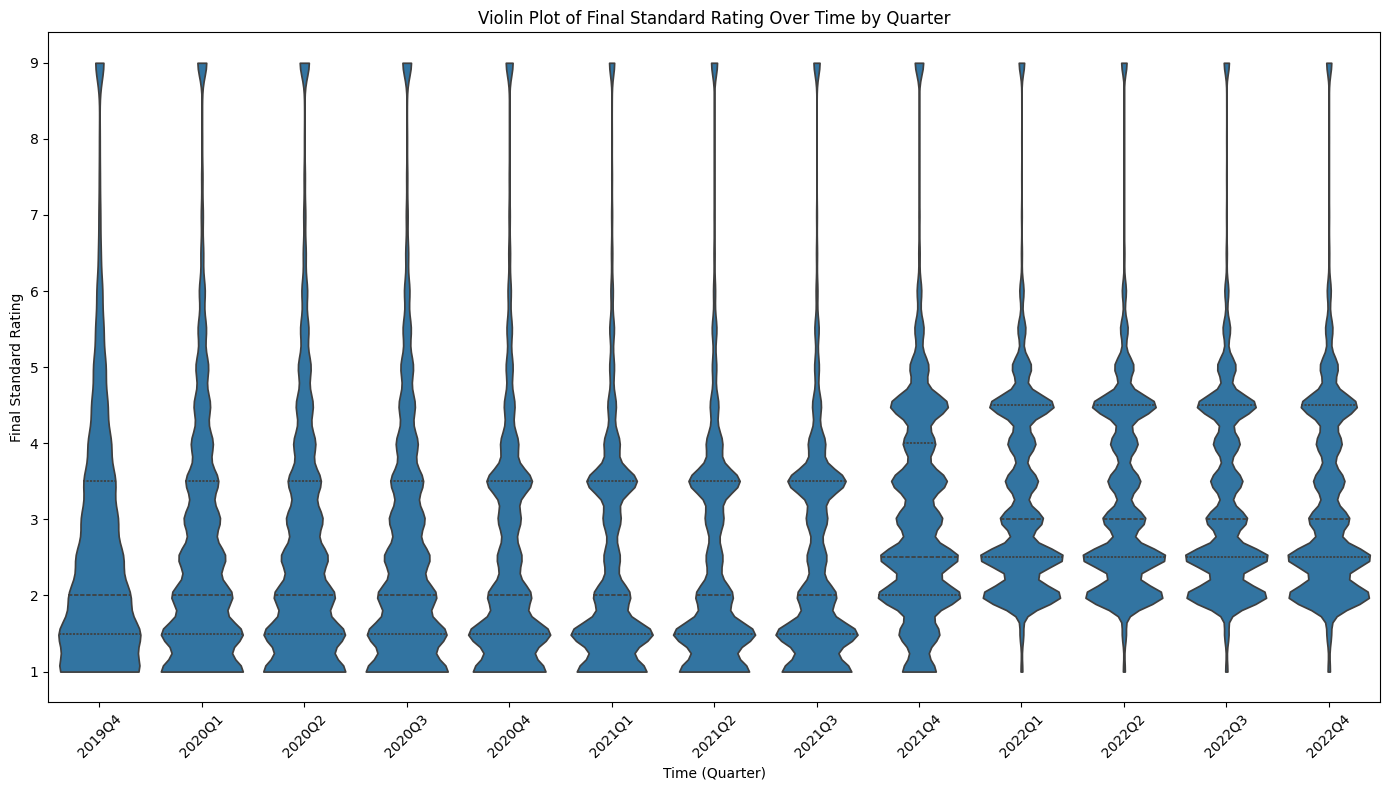

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# Convert 'LOAD_DTTM' to a datetime object and sort
data_p['LOAD_DTTM'] = pd.to_datetime(data_p['LOAD_DTTM'])
data_p.sort_values('LOAD_DTTM', inplace=True)

# Create a violin plot of FINAL_STANDARD_RATING over time
plt.figure(figsize=(14, 8))  # Increased figure size for better readability
sns.violinplot(
    x=data_p['LOAD_DTTM'].dt.to_period('Q'),  # Group by quarter
    y=data_p['FINAL_RATING_STANDARD'],
    scale='width',  # Scale the violins to the same width
    inner='quartile',  # Add quartile lines inside the violins
    cut=0  # Limit the length of the violins
)

plt.xlabel('Time (Quarter)')
plt.ylabel('Final Standard Rating')
plt.title('Violin Plot of Final Standard Rating Over Time by Quarter')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Improve the layout to prevent label overlap
plt.tight_layout()

plt.grid(False)  # Add a grid for better alignment
plt.show()


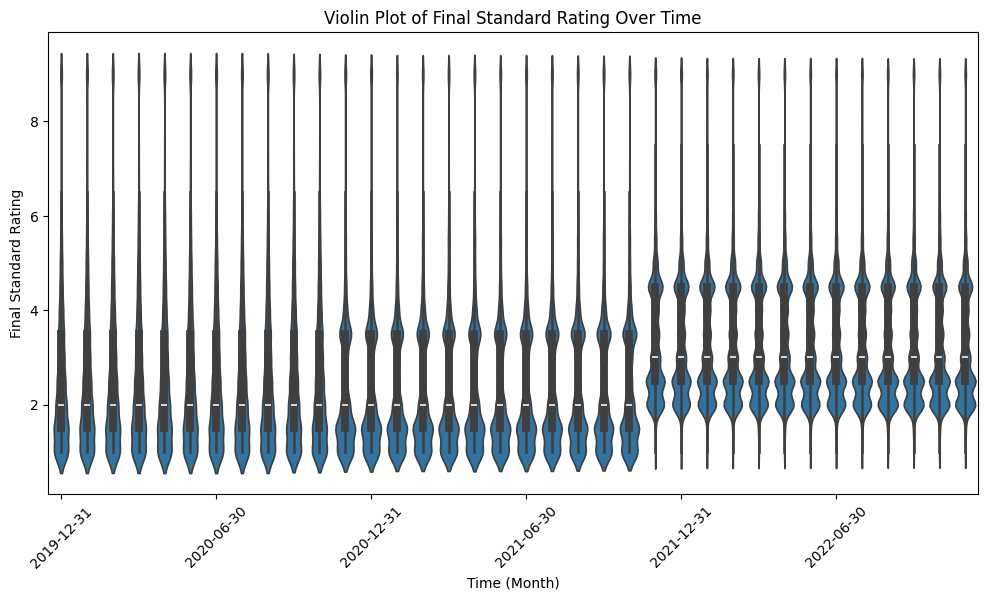

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator

# Create a violin plot of FINAL_STANDARD_RATING over time
plt.figure(figsize=(12, 6))
sns.violinplot(x=data_p['LOAD_DTTM'].astype(str), y=data_p['FINAL_RATING_STANDARD'])
plt.xlabel('Time (Month)')
plt.ylabel('Final Standard Rating')
plt.title('Violin Plot of Final Standard Rating Over Time')

# Ensure that 'LOAD_DTTM' has been converted to string format for plotting purposes
if len(data_p['LOAD_DTTM'].astype(str).unique()) > 0:
    locator = MultipleLocator(6)  # Display every sixth label
    plt.gca().xaxis.set_major_locator(locator)

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


/Users/eugeniulitvinenco/anaconda3/envs/tf-m1/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


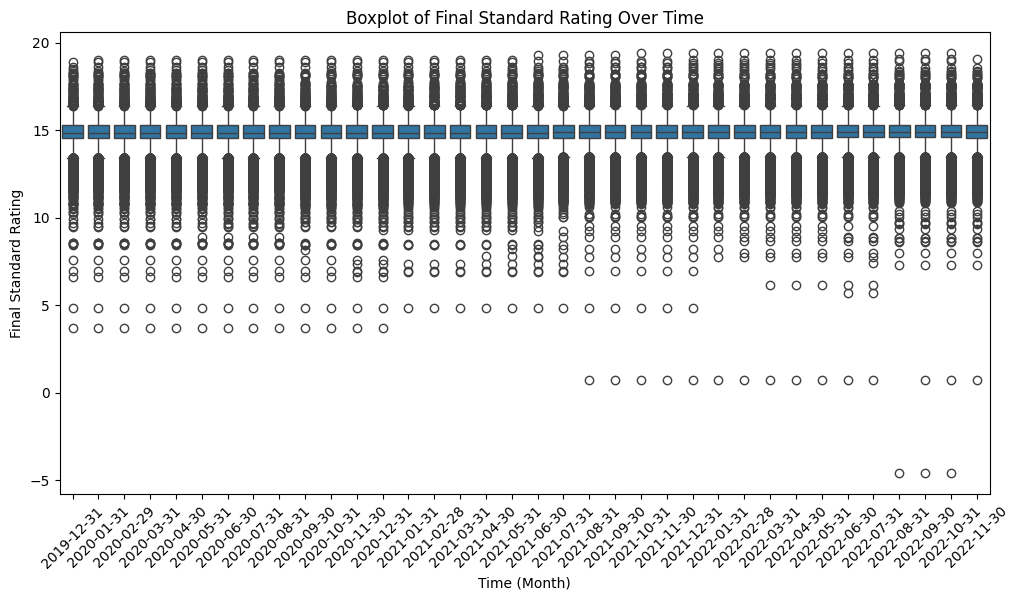

In [31]:
import numpy as np
# Create a boxplot of FINAL_STANDARD_RATING over time
plt.figure(figsize=(12, 6))
sns.boxplot(x=data_p['LOAD_DTTM'].astype(str), y=np.log(data_p['ASSET_AMT']))
plt.xlabel('Time (Month)')
plt.ylabel('Final Standard Rating')
plt.title('Boxplot of Final Standard Rating Over Time')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

### Old

In [37]:
from sklearn.linear_model import LinearRegression

# Define the columns for imputation (including the target column)
columns_for_imputation = ['EXPOSURE', 'ASSET_AMT', 'TOTAL_FINAN_OBT_VS_TOTAL_PASSIVO']

# Create a DataFrame with selected columns
data_for_imputation = data_p[columns_for_imputation]

# Separate the target column (EXPOSURE) from the features
target_column = 'EXPOSURE'
features_columns = [col for col in columns_for_imputation if col != target_column]

# Split the data into two sets: one with missing values in the target column and one without
data_missing = data_for_imputation[data_for_imputation[target_column].isnull()]
data_not_missing = data_for_imputation.dropna(subset=[target_column])

# Separate features and target for the set without missing values
X_train = data_not_missing[features_columns]
y_train = data_not_missing[target_column]

# Separate features for the set with missing values
X_missing = data_missing[features_columns]

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the set without missing values
model.fit(X_train, y_train)

# Predict the missing values using the trained model
imputed_values = model.predict(X_missing)

# Update the original DataFrame with the imputed values for the target column
data_p.loc[data_for_imputation[target_column].isnull(), target_column] = imputed_values


Unique values in 'SECTION_ECONOMIC_ACTIVITY_CD': ['G', 'A', 'UNKNOWN', 'F', 'C', ..., 'D', 'P', 'E', 'S', 'O']
Length: 20
Categories (20, object): ['A', 'B', 'C', 'D', ..., 'Q', 'R', 'S', 'UNKNOWN']
Unique values in 'FLAG_STARTUP': [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Unique values in 'FLAG_ESFL': [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Unique values in 'FLAG_SGPS': [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Unique values in 'INDICADOR_CRED_VENC_BANCA_12M': [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Unique values in 'INDICADOR_CRED_VENC_GCA_12M': [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Unique values in 'FLAG_DESCOBERTOS_N_AUT_12M': [0, 1]
Categories (2, int64): [0, 1]
Unique values in 'X_UTR_CD_12M': [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Unique values in 'DEFAULT_FLG': [0.0, 1.0]
Categories (2, float64): [0.0, 1.0]
Unique values in 'IDENTIFIER': [1, 2, 3, 5, 6, ..., 46166, 46168, 46170, 46171, 46177]
Length: 34157
Categories (34157, int64): [1, 

In [25]:
data_p['EXPOSURE'].median()

205565.35

In [22]:
a = data_p[data_p['DEFAULT_FLG']== 1]
a['IDENTIFIER'].unique()

[10, 19, 25, 40, 59, ..., 42012, 42751, 42799, 44081, 46004]
Length: 794
Categories (34157, int64): [1, 2, 3, 5, ..., 46168, 46170, 46171, 46177]